In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
import statsmodels.api as sm
import sklearn.metrics as skm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('data.csv')
df.head()

,Index,State/Union Territory,District,Crop,Year,Season,Area (Hectare),Production (Tonnes),Yield (Tonnes/Hectare)
0,1,Andaman and Nicobar Islands,Nicobars,Rice,2010,Autumn,3.50,10.0,2.857143
1,2,Andaman and Nicobar Islands,Nicobars,Rice,2011,Autumn,1.50,2.5,1.666667
2,3,Andaman and Nicobar Islands,Nicobars,Rice,2012,Autumn,0.35,0.4,1.142857
3,4,Andaman and Nicobar Islands,Nicobars,Rice,2013,Autumn,2.65,6.3,2.377358
4,5,Andaman and Nicobar Islands,Nicobars,Rice,2014,Autumn,4.60,10.8,2.347826


In [3]:
df.tail()

,Index,State/Union Territory,District,Crop,Year,Season,Area (Hectare),Production (Tonnes),Yield (Tonnes/Hectare)
18257,18295,West Bengal,Purulia,Wheat,2015,Rabi,855.0,1241.0,1.451462
18258,18296,West Bengal,Purulia,Wheat,2016,Rabi,1366.0,2415.0,1.767936
18259,18297,West Bengal,Purulia,Wheat,2017,Rabi,1052.0,2145.0,2.038973
18260,18298,West Bengal,Purulia,Wheat,2018,Rabi,833.0,2114.0,2.537815
18261,18299,West Bengal,Purulia,Wheat,2019,Rabi,516.0,931.0,1.804264


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18262 entries, 0 to 18261
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Index                   18262 non-null  int64  
 1   State/Union Territory   18262 non-null  object 
 2   District                18262 non-null  object 
 3   Crop                    18262 non-null  object 
 4   Year                    18262 non-null  int64  
 5   Season                  18262 non-null  object 
 6   Area (Hectare)          18262 non-null  float64
 7   Production (Tonnes)     18245 non-null  float64
 8   Yield (Tonnes/Hectare)  18262 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 1.3+ MB


In [5]:
df.describe()

,Index,Year,Area (Hectare),Production (Tonnes),Yield (Tonnes/Hectare)
count,18262.000000,18262.000000,18262.000000,1.824500e+04,18262.000000
mean,9151.704523,2014.676541,56207.866006,1.549210e+05,2.387355
std,5281.523573,2.881904,74847.415007,2.370063e+05,1.028731
min,1.000000,2010.000000,0.350000,0.000000e+00,0.000000
25%,4580.250000,2012.000000,3090.000000,5.339000e+03,1.638134
50%,9145.500000,2015.000000,24532.000000,5.162800e+04,2.319943
75%,13733.750000,2017.000000,86392.250000,2.107840e+05,3.013726
max,18299.000000,2020.000000,920000.000000,2.110172e+06,7.176796


In [6]:
df.describe(include=object)

,State/Union Territory,District,Crop,Season
count,18262,18262,18262,18262
unique,36,794,2,7
top,Uttar Pradesh,Kokrajhar,Rice,Rabi
freq,1924,50,13056,5649


In [7]:
df.shape

(18262, 9)

In [8]:
df.isna().sum()

Index                      0
State/Union Territory      0
District                   0
Crop                       0
Year                       0
Season                     0
Area (Hectare)             0
Production (Tonnes)       17
Yield (Tonnes/Hectare)     0
dtype: int64

In [9]:
df[df['Production (Tonnes)'].isna()]

,Index,State/Union Territory,District,Crop,Year,Season,Area (Hectare),Production (Tonnes),Yield (Tonnes/Hectare)
506,518,Andhra Pradesh,Kadapa,Wheat,2019,Rabi,1.0,NaN,0.0
5114,5129,Haryana,Mahendragarh,Rice,2011,Kharif,39.0,NaN,0.0
8379,8394,Kerala,Idukki,Wheat,2012,Whole Year,1.0,NaN,0.0
8394,8409,Madhya Pradesh,Agar Malwa,Rice,2019,Summer,98.0,NaN,0.0
8658,8673,Madhya Pradesh,Khandwa,Rice,2019,Summer,2605.0,NaN,0.0
8880,8895,Madhya Pradesh,Ujjain,Rice,2019,Summer,29.0,NaN,0.0
9704,9719,Maharashtra,Parbhani,Rice,2014,Kharif,300.0,NaN,0.0
9827,9842,Maharashtra,Solapur,Rice,2015,Kharif,200.0,NaN,0.0
9865,9880,Maharashtra,Yavatmal,Rice,2013,Kharif,100.0,NaN,0.0
12119,12134,Odisha,Nayagarh,Rice,2012,Summer,209000.0,NaN,0.0


In [10]:
df['Production (Tonnes)'].fillna(0, inplace=True)

/var/folders/s9/9mvfxgrs1wb9r54tth0nzksm0000gn/T/ipykernel_2065/343682076.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Production (Tonnes)'].fillna(0, inplace=True)


In [11]:
df['Production (Tonnes)'].isna().sum()

np.int64(0)

In [12]:
df.duplicated().sum()

np.int64(0)

In [13]:
df['Season'].value_counts()

Season
Rabi           5649
Kharif         4497
Total          2776
Summer         2091
Winter         1669
Autumn         1573
Whole Year        7
Name: count, dtype: int64

In [14]:
df.drop(df[df['Season'] == 'Total'].index, inplace=True)

In [15]:
df.drop(df[['Index', 'Yield (Tonnes/Hectare)']], axis=1, inplace=True)

<Axes: >

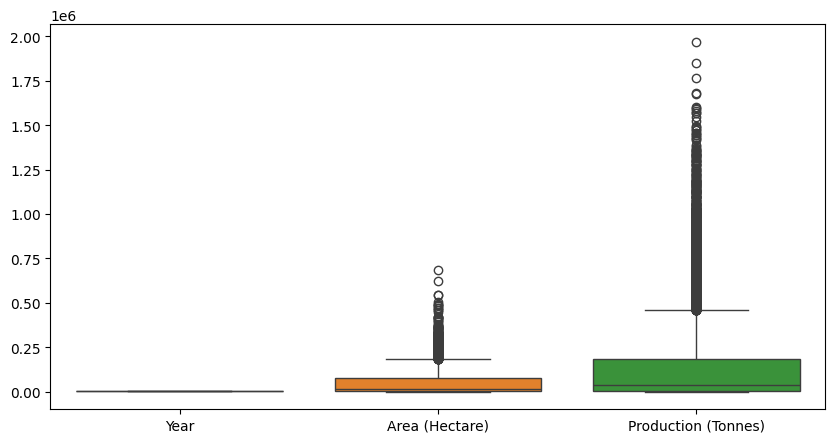

In [16]:
plt.figure(figsize=(10,5))
sns.boxplot(df)

In [17]:
df.describe()

,Year,Area (Hectare),Production (Tonnes)
count,15486.000000,15486.000000,1.548600e+04
mean,2014.657949,49065.255867,1.401644e+05
std,2.881327,66086.220051,2.228372e+05
min,2010.000000,0.350000,0.000000e+00
25%,2012.000000,2039.000000,3.529000e+03
50%,2015.000000,18235.500000,3.732200e+04
75%,2017.000000,76007.500000,1.859012e+05
max,2020.000000,687000.000000,1.969000e+06


In [18]:
np.mean(df['Area (Hectare)'])

np.float64(49065.25586658917)

In [19]:
df.rename(columns={'State/Union Territory': 'State and UT'}, inplace=True)

/var/folders/s9/9mvfxgrs1wb9r54tth0nzksm0000gn/T/ipykernel_2065/4163307164.py:8: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 0}` instead.

  sns.barplot(x=DF['State and UT'].head(5),


,State and UT,Area (Hectare)
33,Uttar Pradesh,156722905.0
19,Madhya Pradesh,84905654.0
27,Punjab,61871000.0
35,West Bengal,57023596.0
4,Bihar,53423287.0


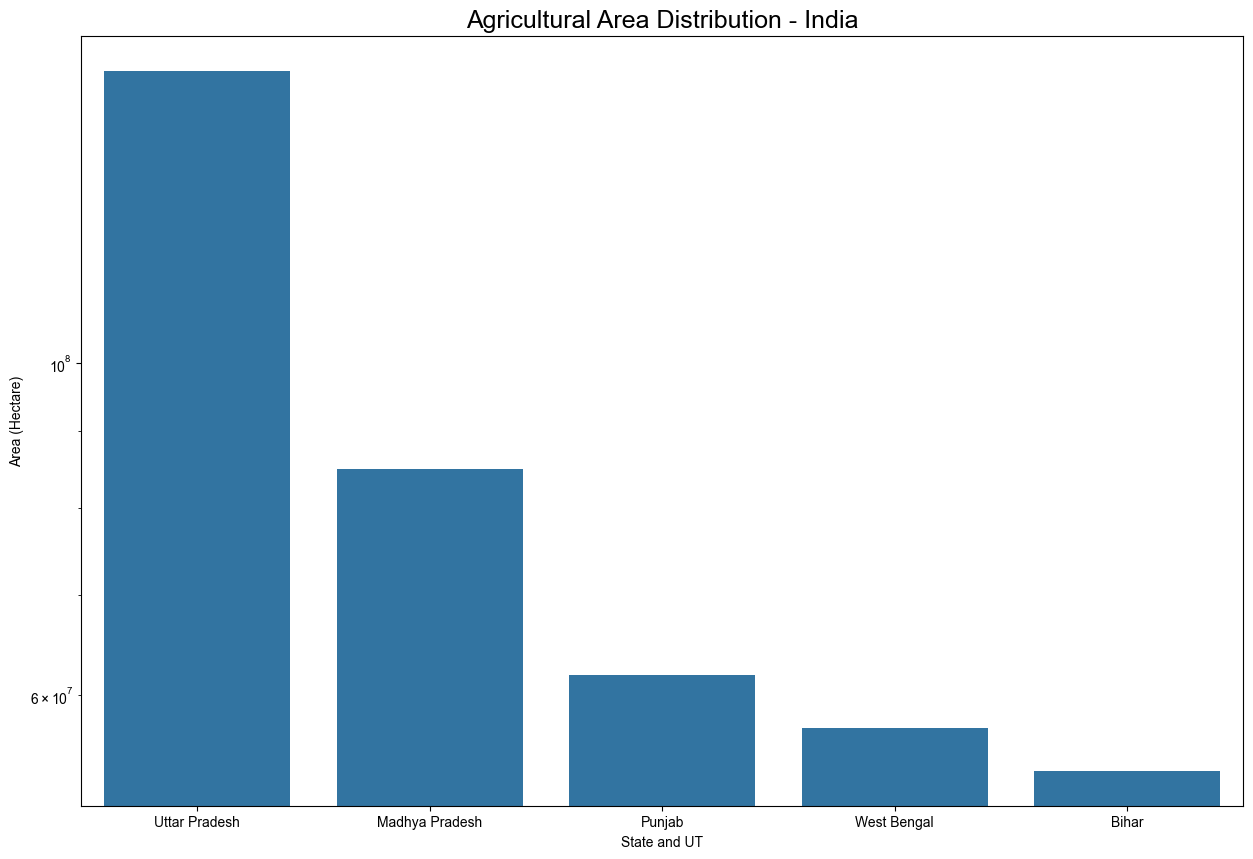

In [20]:
DF = df.copy()
DF = DF.groupby(
    by='State and UT')['Area (Hectare)'].sum().reset_index().sort_values(
        by='Area (Hectare)', ascending=False)
DF.head()

fig, ax = plt.subplots(figsize=(15, 10))
sns.barplot(x=DF['State and UT'].head(5),
            y=DF['Area (Hectare)'].head(5),
            errwidth=0)
sns.set(font_scale=1.5)
plt.yscale('log')
plt.title('Agricultural Area Distribution - India')
DF.head(5)

In [21]:
df['State and UT'].nunique()

36

In [22]:
df['State and UT'].value_counts()

State and UT
Uttar Pradesh                  1706
Bihar                          1210
Assam                          1053
Madhya Pradesh                 1002
Odisha                          963
Karnataka                       857
West Bengal                     772
Maharashtra                     655
Jharkhand                       604
Gujarat                         598
Rajasthan                       536
Chhattisgarh                    509
Tamil Nadu                      491
Haryana                         418
Kerala                          417
Punjab                          412
Telangana                       366
Andhra Pradesh                  348
Meghalaya                       331
Uttarakhand                     318
Jammu and Kashmir               304
Arunachal Pradesh               289
Tripura                         245
Nagaland                        231
Himachal Pradesh                230
Mizoram                         185
Manipur                         138
Puducherry     

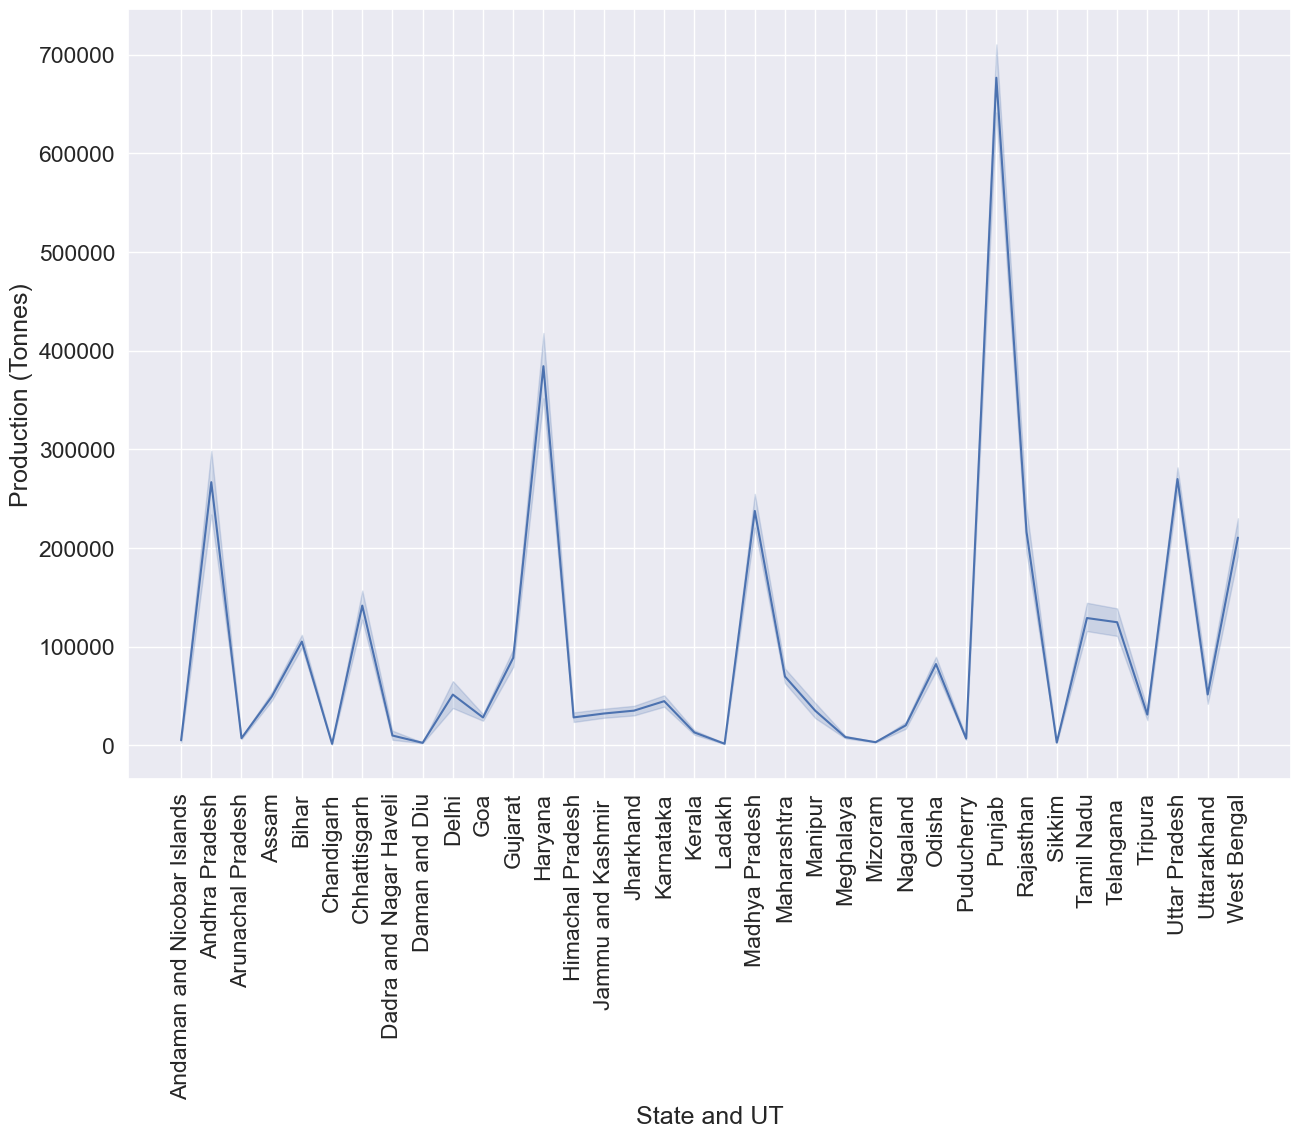

In [23]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.lineplot(x=df['State and UT'], y=df['Production (Tonnes)'])
plt.xticks(rotation=90)
plt.show()

In [24]:
fig, ax = plt.subplots(figsize=(37, 250), sharex='col')
count = 1

for state in df['State and UT'].unique():
    plt.subplot(len(df['State and UT'].unique()), 1, count)
    sns.lineplot(x=df[df['State and UT'] == state]['Year'],
                 y=df[df['State and UT'] == state]['Production (Tonnes)'],
                 ci=None)
    sns.set(font_scale=2)
    plt.subplots_adjust(hspace=1)
    plt.title(state)
    count += 1

plt.show()

/var/folders/s9/9mvfxgrs1wb9r54tth0nzksm0000gn/T/ipykernel_2065/126277725.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x=df[df['State and UT'] == state]['Year'],
/var/folders/s9/9mvfxgrs1wb9r54tth0nzksm0000gn/T/ipykernel_2065/126277725.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x=df[df['State and UT'] == state]['Year'],
/var/folders/s9/9mvfxgrs1wb9r54tth0nzksm0000gn/T/ipykernel_2065/126277725.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x=df[df['State and UT'] == state]['Year'],
/var/folders/s9/9mvfxgrs1wb9r54tth0nzksm0000gn/T/ipykernel_2065/126277725.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x=df[df['State and UT'] == state]['Year'],
/var/folders/s9/9mvfxgrs1wb9r54tth0nzksm0000gn/T/ipykernel_2065/126277725.py

In [25]:
df['District'].nunique()

774

In [26]:
df.groupby(['State and UT',
            'District']).sum().nlargest(10, 'Production (Tonnes)')

Crop  \
State and UT District                                                             
Punjab       Sangrur          RiceRiceRiceRiceRiceRiceRiceRiceRiceWheatWheat...   
             Ludhiana         RiceRiceRiceRiceRiceRiceRiceRiceRiceWheatWheat...   
             Patiala          RiceRiceRiceRiceRiceRiceRiceRiceRiceWheatWheat...   
West Bengal  Medinipur West   RiceRiceRiceRiceRiceRiceRiceRiceRiceRiceRiceRi...   
Punjab       Bathinda         RiceRiceRiceRiceRiceRiceRiceRiceRiceWheatWheat...   
West Bengal  Purba Bardhaman  RiceRiceRiceRiceRiceRiceRiceRiceRiceRiceRiceRi...   
Punjab       Firozepur        RiceRiceRiceRiceRiceRiceRiceRiceRiceWheatWheat...   
Haryana      Sirsa            RiceRiceRiceRiceRiceRiceRiceRiceRiceRiceWheatW...   
Punjab       Moga             RiceRiceRiceRiceRiceRiceRiceRiceRiceWheatWheat...   
             Muktsar          RiceRiceRiceRiceRiceRiceRiceRiceRiceWheatWheat...   

                               Year  \
State and UT District                 
Punjab       Sangrur          38280   
             Ludhiana         38280   
             Patiala          38280   
West Bengal  Medinipur West   80580   
Punjab       Bathinda         38280   
West Bengal  Purba Bardhaman  80580   
Punjab       Firozepur        38280   
Haryana      Sirsa            40290   
Punjab       Moga             38280   
             Muktsar          38280   

                                                                         Season  \
State and UT District                                                             
Punjab       Sangrur          Kharif     Kharif     Kharif     Kharif     Kh...   
             Ludhiana         Kharif     Kharif     Kharif     Kharif     Kh...   
             Patiala          Kharif     Kharif     Kharif     Kharif     Kh...   
West Bengal  Medinipur West   Autumn     Summer     Winter     Autumn     Su...   
Punjab       Bathinda         Kharif     Kharif     Kharif     Kharif     Kh...   
West Bengal  Purba Bardhaman  Autumn     Summer     Winter     Autumn     Su...   
Punjab       Firozepur        Kharif     Kharif     Kharif     Kharif     Kh...   
Haryana      Sirsa            Kharif     Kharif     Kharif     Kharif     Kh...   
Punjab       Moga             Kharif     Kharif     Kharif     Kharif     Kh...   
             Muktsar          Kharif     Kharif     Kharif     Kharif     Kh...   

                              Area (Hectare)  Production (Tonnes)  
State and UT District                                              
Punjab       Sangrur               5375000.0           27280000.0  
             Ludhiana              4851000.0           23194000.0  
             Patiala               4428000.0           20049000.0  
West Bengal  Medinipur West        6494390.0           18598637.0  
Punjab       Bathinda              3770000.0           18277000.0  
West Bengal  Purba Bardhaman       5612359.0           18040861.0  
Punjab       Firozepur             3956000.0           18025000.0  
Haryana      Sirsa                 3777187.0           17436400.0  
Punjab       Moga                  3362000.0           16331000.0  
             Muktsar               3439000.0           15746000.0

In [27]:
df['Crop'].value_counts()

Crop
Rice     10297
Wheat     5189
Name: count, dtype: int64

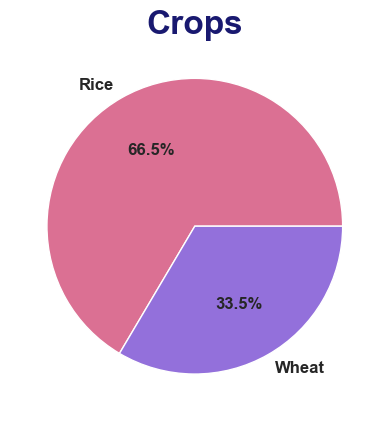

In [28]:
plt.pie(df['Crop'].value_counts(),
        colors=['palevioletred', 'mediumpurple'],
        labels=['Rice', 'Wheat'],
        autopct='%1.1f%%',
        textprops={
            'fontsize': 12,
            'weight': 'bold'
        })

plt.title('Crops', color='midnightblue', weight='bold')
plt.show()

In [29]:
df.groupby('Crop')['Production (Tonnes)'].sum().reset_index().sort_values(
    by='Production (Tonnes)', ascending=False)

,Crop,Production (Tonnes)
0,Rice,1.113296e+09
1,Wheat,1.057289e+09


/var/folders/s9/9mvfxgrs1wb9r54tth0nzksm0000gn/T/ipykernel_2065/1778991173.py:7: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 2}` instead.

  sns.barplot(x=DF['Crop'], y=DF['Production (Tonnes)'], errwidth=2)


,Crop,Production (Tonnes)
0,Rice,1.113296e+09
1,Wheat,1.057289e+09


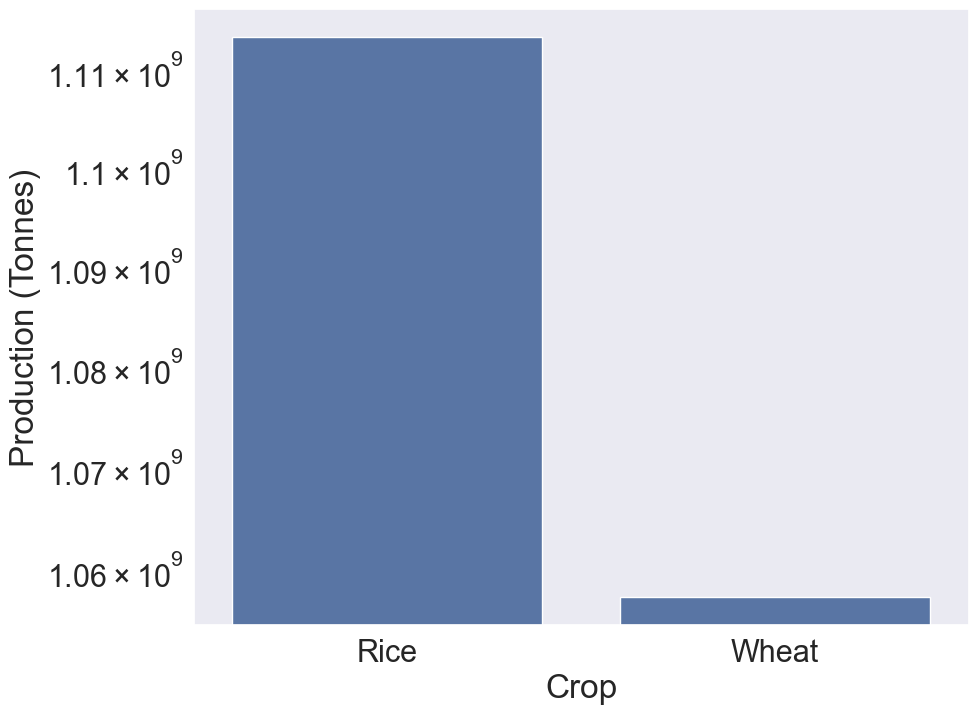

In [30]:
DF = df.copy()
DF = DF.groupby(
    by='Crop')['Production (Tonnes)'].sum().reset_index().sort_values(
        by='Production (Tonnes)', ascending=False)

fig, ax = plt.subplots(figsize=(10, 8))
sns.barplot(x=DF['Crop'], y=DF['Production (Tonnes)'], errwidth=2)
sns.set(font_scale=1)
plt.yscale('log')
DF

In [31]:
rice = df[df['Crop'] == 'Rice']
rice

,State and UT,District,Crop,Year,Season,Area (Hectare),Production (Tonnes)
0,Andaman and Nicobar Islands,Nicobars,Rice,2010,Autumn,3.50,10.0
1,Andaman and Nicobar Islands,Nicobars,Rice,2011,Autumn,1.50,2.5
2,Andaman and Nicobar Islands,Nicobars,Rice,2012,Autumn,0.35,0.4
3,Andaman and Nicobar Islands,Nicobars,Rice,2013,Autumn,2.65,6.3
4,Andaman and Nicobar Islands,Nicobars,Rice,2014,Autumn,4.60,10.8
...,...,...,...,...,...,...,...
18064,West Bengal,Purulia,Rice,2018,Summer,378.00,1144.0
18065,West Bengal,Purulia,Rice,2018,Winter,281236.00,615025.0
18067,West Bengal,Purulia,Rice,2019,Autumn,346.00,801.0
18068,West Bengal,Purulia,Rice,2019,Summer,544.00,1644.0


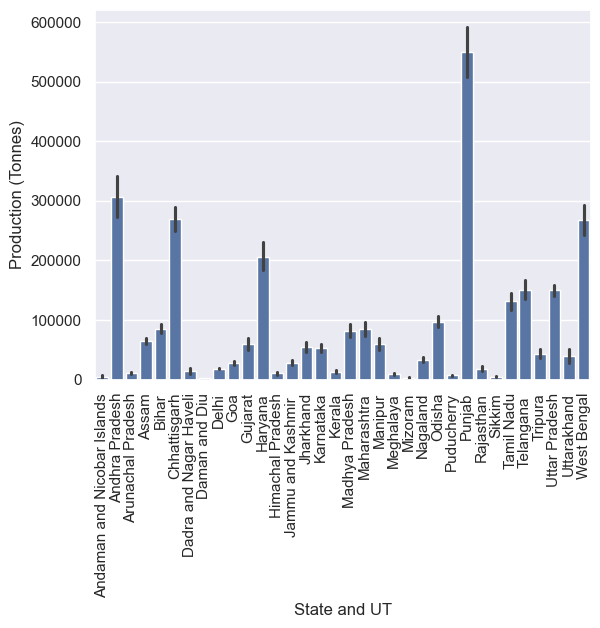

In [33]:
sns.barplot(x='State and UT', y='Production (Tonnes)', data=rice)
plt.xticks(rotation=90)
plt.show()


/var/folders/s9/9mvfxgrs1wb9r54tth0nzksm0000gn/T/ipykernel_2065/3741753446.py:7: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 2}` instead.

  sns.barplot(x=DF['District'].head(),


,District,Production (Tonnes)
452,Medinipur West,18516870.0
535,Purba Bardhaman,17986460.0
708,West Godavari,15484297.0
230,East Godavari,14462982.0
148,Birbhum,12052434.0


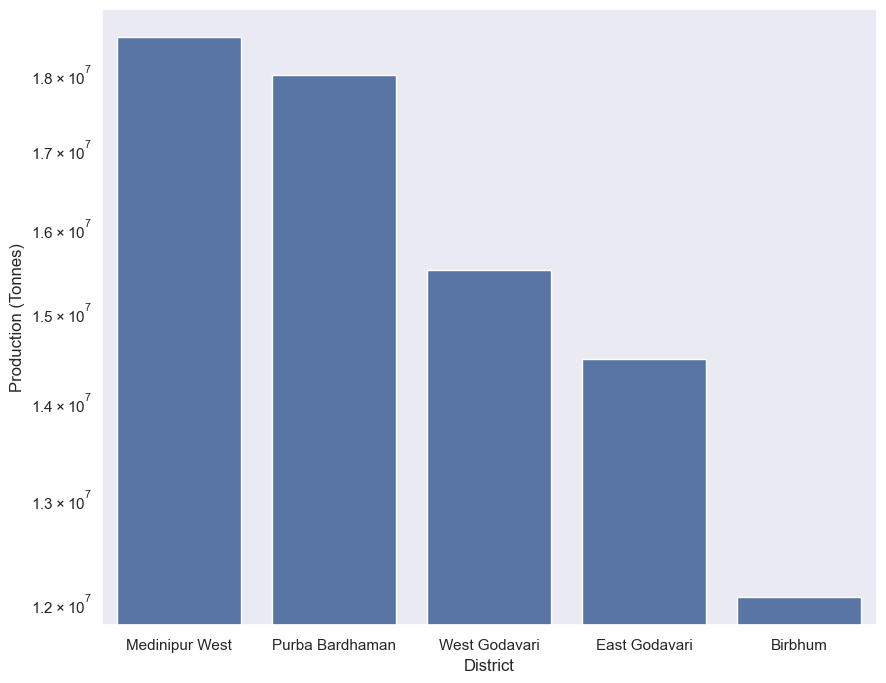

In [34]:
DF = rice.copy()
DF = DF.groupby(
    by='District')['Production (Tonnes)'].sum().reset_index().sort_values(
        by='Production (Tonnes)', ascending=False)

fig, ax = plt.subplots(figsize=(10, 8))
sns.barplot(x=DF['District'].head(),
            y=DF['Production (Tonnes)'].head(),
            errwidth=2)
sns.set(font_scale=1)
plt.yscale('log')
DF.head()

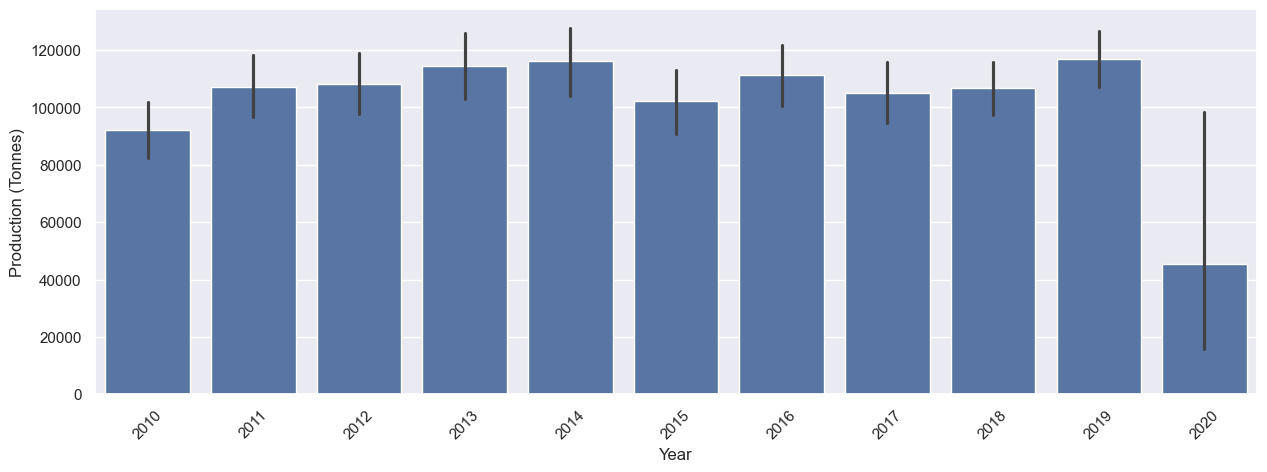

In [35]:
plt.figure(figsize=(15, 5))
sns.barplot(x='Year', y='Production (Tonnes)', data=rice)
plt.xticks(rotation=45)
plt.show()

/Users/praneetgogoi/Library/Python/3.9/lib/python/site-packages/numpy/linalg/_linalg.py:3220: RuntimeWarning: divide by zero encountered in matmul
  return _core_matmul(x1, x2)
/Users/praneetgogoi/Library/Python/3.9/lib/python/site-packages/numpy/linalg/_linalg.py:3220: RuntimeWarning: overflow encountered in matmul
  return _core_matmul(x1, x2)
/Users/praneetgogoi/Library/Python/3.9/lib/python/site-packages/numpy/linalg/_linalg.py:3220: RuntimeWarning: invalid value encountered in matmul
  return _core_matmul(x1, x2)


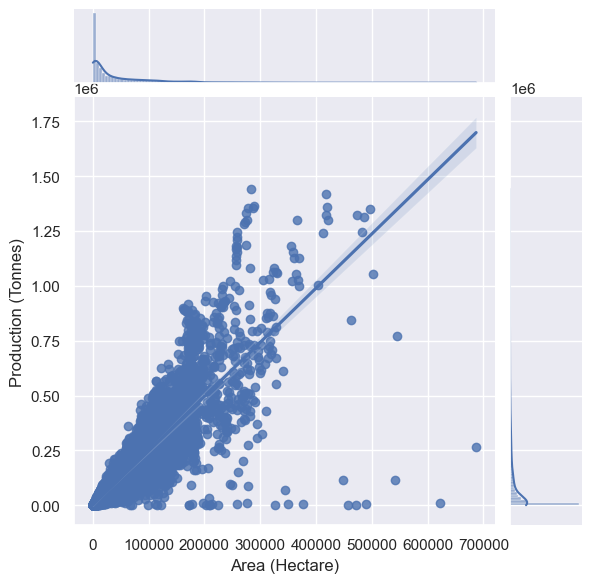

In [37]:
sns.jointplot(x='Area (Hectare)',
              y='Production (Tonnes)',
              data=rice,
              kind='reg')


In [38]:
wheat = df[df['Crop'] == 'Wheat']
wheat.head()

,State and UT,District,Crop,Year,Season,Area (Hectare),Production (Tonnes)
488,Andhra Pradesh,Adilabad,Wheat,2010,Rabi,4046.0,5199.0
489,Andhra Pradesh,Adilabad,Wheat,2011,Rabi,3275.0,4330.0
490,Andhra Pradesh,Adilabad,Wheat,2012,Rabi,4000.0,4000.0
491,Andhra Pradesh,Anantapur,Wheat,2010,Rabi,131.0,171.0
492,Andhra Pradesh,Anantapur,Wheat,2011,Rabi,75.0,100.0


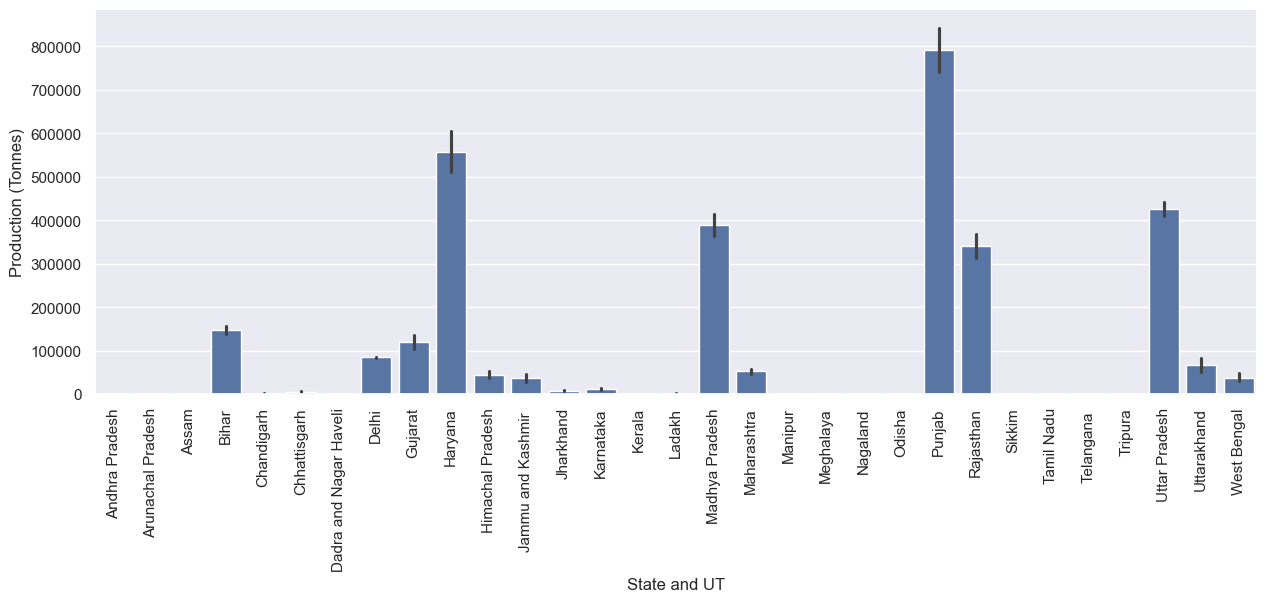

In [39]:
plt.figure(figsize=(15, 5))
sns.barplot(x='State and UT', y='Production (Tonnes)', data=wheat)
plt.xticks(rotation=90)
plt.show()

In [40]:
TopWheatPro = wheat.groupby(
    'District')['Production (Tonnes)'].sum().reset_index().sort_values(
        by='Production (Tonnes)', ascending=False)
summ = TopWheatPro['Production (Tonnes)'].sum()
TopWheatPro['Production in %'] = TopWheatPro['Production (Tonnes)'].map(
    lambda x: (x / summ) * 100)
TopWheatPro.head()

,District,Production (Tonnes),Production in %
494,Sangrur,15376000.0,1.454285
527,Sirsa,14890500.0,1.408366
84,Bathinda,12798000.0,1.210454
351,Ludhiana,12659000.0,1.197307
437,Patiala,11618000.0,1.098848


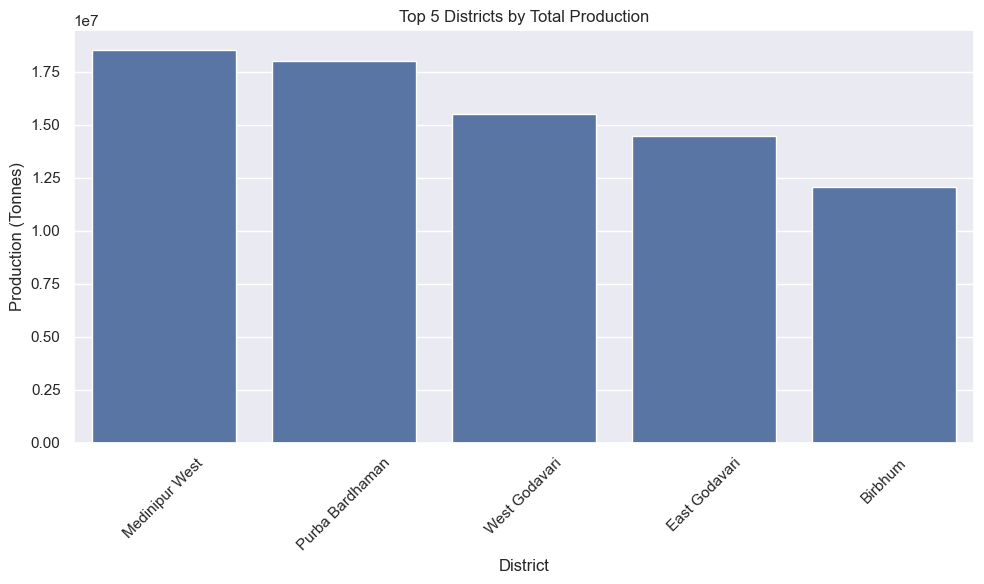

,District,Production (Tonnes)
452,Medinipur West,18516870.0
535,Purba Bardhaman,17986460.0
708,West Godavari,15484297.0
230,East Godavari,14462982.0
148,Birbhum,12052434.0


In [43]:
DF1 = wheat.copy()
DF1 = DF1.groupby(
    by='District')['Production (Tonnes)'].sum().reset_index().sort_values(
        by='Production (Tonnes)', ascending=False)

import matplotlib.pyplot as plt
import seaborn as sns

# Sample data for top districts by production
top_districts = rice.groupby('District')['Production (Tonnes)'].sum().sort_values(ascending=False).head(5).reset_index()

plt.figure(figsize=(10,6))
sns.barplot(x='District', y='Production (Tonnes)', data=top_districts)
plt.title("Top 5 Districts by Total Production")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
DF.head()


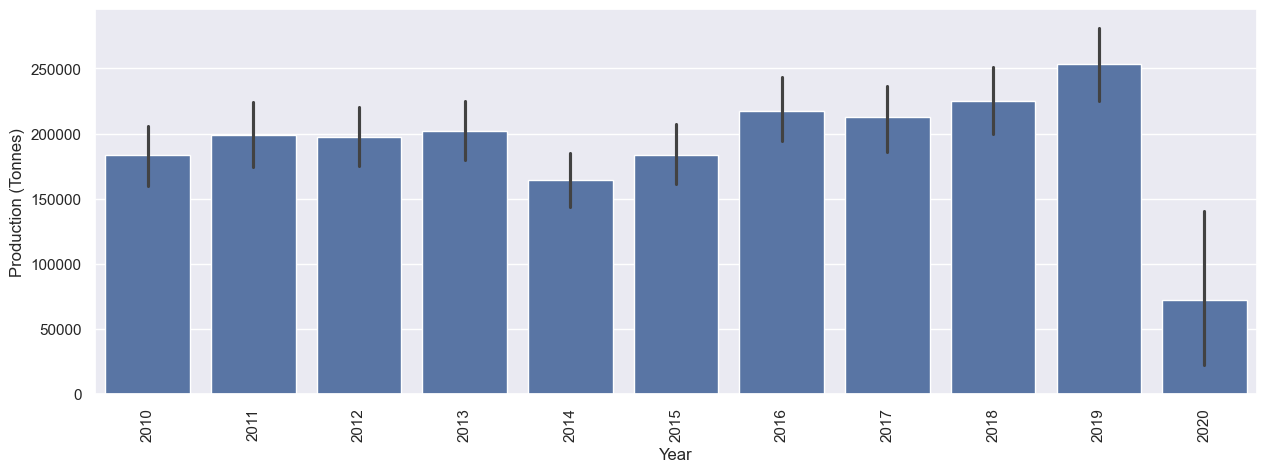

In [44]:
plt.figure(figsize=(15, 5))
sns.barplot(x='Year', y='Production (Tonnes)', data=wheat)
plt.xticks(rotation=90)
plt.show()

In [46]:
df['Year'].nunique()

11

In [47]:
df['Year'].value_counts()

Year
2019    1675
2017    1648
2018    1644
2016    1591
2015    1511
2014    1506
2012    1503
2011    1500
2013    1483
2010    1396
2020      29
Name: count, dtype: int64

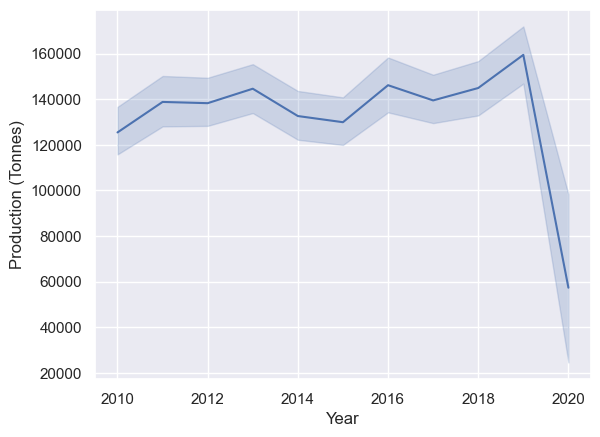

In [48]:
sns.lineplot(x=df['Year'],y=df['Production (Tonnes)'])
plt.show()

In [49]:
df['Season'].value_counts()

Season
Rabi           5649
Kharif         4497
Summer         2091
Winter         1669
Autumn         1573
Whole Year        7
Name: count, dtype: int64

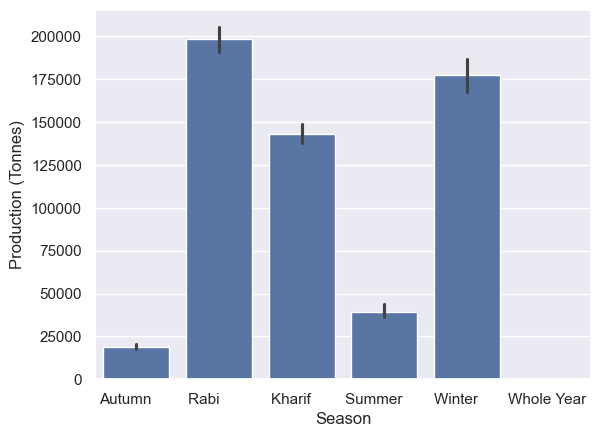

In [50]:
sns.barplot(x=df['Season'], y=df['Production (Tonnes)'])
plt.show()

/var/folders/s9/9mvfxgrs1wb9r54tth0nzksm0000gn/T/ipykernel_2065/1963975094.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 100)` for the same effect.

  sns.barplot(x='Season', y='Production (Tonnes)', data=rice, ci=100)


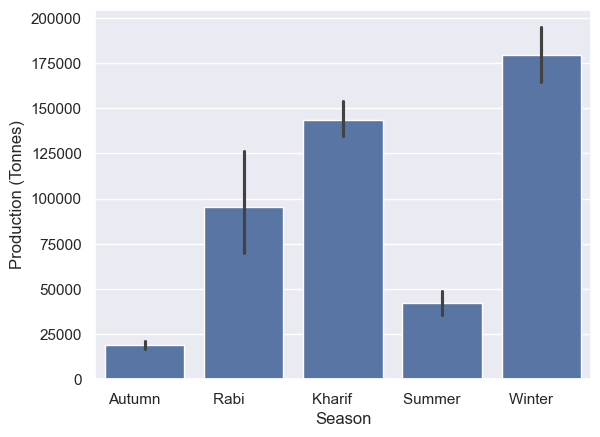

In [51]:
sns.barplot(x='Season', y='Production (Tonnes)', data=rice, ci=100)
sns.set(font_scale=1)

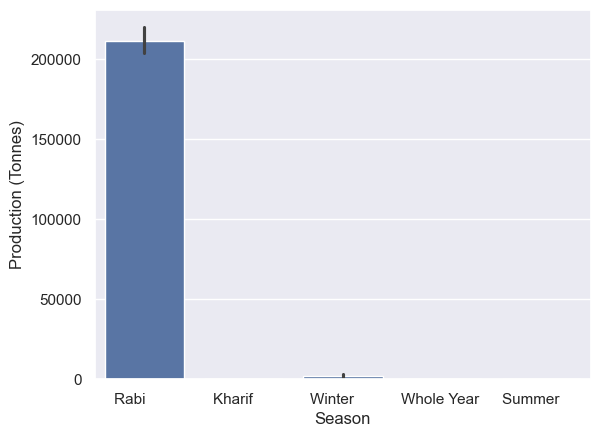

In [52]:
sns.barplot(x='Season', y='Production (Tonnes)', data=wheat)
sns.set(font_scale=1)

In [53]:
categorical_columns = ['State and UT', 'Season', 'Crop', 'District']

for i in categorical_columns:
    cat_DF = pd.get_dummies(df[i], dtype=int, drop_first=True)
    df = pd.merge(left=df, right=cat_DF, right_index=True, left_index=True)
    df.drop(columns=i, inplace=True)
df

,Year,Area (Hectare),Production (Tonnes),Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chandigarh_x,Chhattisgarh,Dadra and Nagar Haveli_x,...,West Singhbum,West Tripura,Wokha,Yadadri,Yadagiri,Yamunanagar,Yanam,Yavatmal,Zunheboto,chamba
0,2010,3.50,10.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2011,1.50,2.5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2012,0.35,0.4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2013,2.65,6.3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2014,4.60,10.8,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18257,2015,855.00,1241.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18258,2016,1366.00,2415.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18259,2017,1052.00,2145.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18260,2018,833.00,2114.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
df.shape

(15486, 817)

In [55]:
df.columns

Index(['Year', 'Area (Hectare)', 'Production (Tonnes)', 'Andhra Pradesh',
       'Arunachal Pradesh', 'Assam', 'Bihar', 'Chandigarh_x', 'Chhattisgarh',
       'Dadra and Nagar Haveli_x',
       ...
       'West Singhbum', 'West Tripura', 'Wokha', 'Yadadri', 'Yadagiri',
       'Yamunanagar', 'Yanam', 'Yavatmal', 'Zunheboto', 'chamba'],
      dtype='object', length=817)

In [57]:
X_df=df.drop(['Production (Tonnes)'],axis=1)

In [58]:
x=df[X_df.columns]
y=df['Production (Tonnes)']

In [59]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, train_size=0.80)